In [2]:
import pandas as pd
from tqdm import tqdm
from transformer.model_transformer import ModelTransformer
from transformer.product_transformer import ProductTransformer
from preprocessor.model_preprocessor import ModelPreprocessor
from extractor.pdr_extractor import PDRExtractor
from modeler.modeler import StockProphet
from database.sec import SEC
from database.market import Market
from database.strategy import Strategy
import warnings
import pickle
from statistics import variance
warnings.simplefilter(action='ignore', category=Warning)
from datetime import datetime, timedelta
import pickle
import matplotlib.pyplot as plt

In [21]:
sec = SEC()
market = Market()
strat = Strategy("quarter_out")
end = "2020-01-01"
start = "2015-07-01"
reporting_gap = 90
sec.connect()
tickers = sec.retrieve_data("sp500")
sec.close()

In [22]:
market.connect()
strat.connect()
i = 33
ticker = tickers.iloc[i]["Symbol"]
cik = int(tickers.iloc[i]["CIK"].item())
price = market.retrieve_price_data(ticker)
filing = sec.retrieve_filing_data(cik)
mt = ModelTransformer(ticker,start,end,reporting_gap)
mr = ModelPreprocessor(ticker)
data = mt.merge(price.copy(),filing.copy())
refined = mr.preprocess(data.copy())
sp = Modeler(ticker)
results = sp.model_boosted(refined)
result_df = pd.DataFrame([results])
# strat.store_data("models_boosted",result_df)
market.close()
strat.close()

In [23]:
model = pickle.loads(result_df["model"].item())

In [24]:
q = PDRExtractor(ticker,start,"2020-07-24")
price = q.extract()
filing = sec.retrieve_filing_data(cik)
mt = ModelTransformer(ticker,start,"2020-07-24",reporting_gap)
mr = ModelPreprocessor(ticker)
data = mt.merge_pdr(price.copy(),filing.copy())
refined = mr.preprocess(data)
pt = ProductTransformer(ticker,start,end,reporting_gap)
final = pt.merge(data.copy(),refined["X"],model)

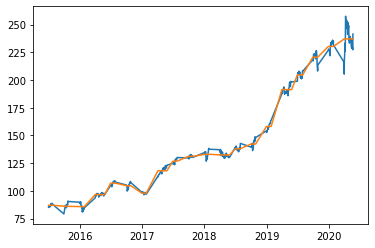

In [25]:
plt.plot(final["Date"],final["Adj_Close"])
plt.plot(final["Date"],final["predicted"])

In [19]:
final

,Date,Adj_Close,predicted,ticker
1,2010-01-04,37.186401,37.262112,AMT
2,2010-01-05,37.802460,37.262112,AMT
3,2010-01-06,37.999264,37.262112,AMT
4,2010-01-07,37.896584,37.262112,AMT
5,2010-01-08,37.973591,37.262112,AMT
...,...,...,...,...
2471,2019-10-25,213.913773,220.593323,AMT
2472,2019-10-28,208.069092,220.593323,AMT
2473,2019-10-29,213.410263,220.593323,AMT
2515,2019-12-30,226.948257,227.375839,AMT


In [26]:
market.connect()
strat.connect()
for i in tqdm(range(len(tickers))):
    try:
        ticker = tickers.iloc[i]["Symbol"]
        cik = int(tickers.iloc[i]["CIK"].item())
        price = market.retrieve_price_data(ticker)
        filing = sec.retrieve_filing_data(cik)
        mt = ModelTransformer(ticker,start,end,reporting_gap)
        mr = ModelPreprocessor(ticker)
        data = mt.merge(price.copy(),filing.copy())
        refined = mr.preprocess(data.copy())
        sp = Modeler(ticker)
        results = sp.model_boosted(refined)
        result_df = pd.DataFrame([results])
        strat.store_data("models_boosted",result_df)
    except Exception as e:
        message = {"status":"modeling","ticker":ticker,"message":str(e)}
        print(message)
strat.connect()
market.close()

  6%|███▏                                                      | 28/505 [01:23<17:46,  2.23s/it]

{'status': 'modeling', 'ticker': 'AMCR', 'message': "Input contains NaN, infinity or a value too large for dtype('float32')."}


 13%|███████▋                                                  | 67/505 [03:42<30:30,  4.18s/it]

{'status': 'modeling', 'ticker': 'BRK.B', 'message': "'Date'"}


 16%|█████████                                                 | 79/505 [04:22<21:36,  3.04s/it]

{'status': 'modeling', 'ticker': 'BF.B', 'message': "'Date'"}


 17%|██████████                                                | 88/505 [04:46<20:01,  2.88s/it]

{'status': 'modeling', 'ticker': 'CARR', 'message': "'filed'"}


 35%|███████████████████▊                                     | 176/505 [09:29<15:55,  2.90s/it]

{'status': 'modeling', 'ticker': 'ESS', 'message': '"[\'Close\'] not found in axis"'}


 35%|████████████████████                                     | 178/505 [09:32<12:42,  2.33s/it]

{'status': 'modeling', 'ticker': 'EVRG', 'message': "Input contains NaN, infinity or a value too large for dtype('float32')."}


 38%|█████████████████████▊                                   | 193/505 [10:22<19:35,  3.77s/it]

{'status': 'modeling', 'ticker': 'FRC', 'message': "'filed'"}


 58%|█████████████████████████████████▏                       | 294/505 [15:46<09:00,  2.56s/it]

{'status': 'modeling', 'ticker': 'LIN', 'message': "Input contains NaN, infinity or a value too large for dtype('float32')."}


 71%|████████████████████████████████████████▋                | 361/505 [19:18<08:15,  3.44s/it]

{'status': 'modeling', 'ticker': 'OTIS', 'message': "'filed'"}


 85%|████████████████████████████████████████████████▎        | 428/505 [22:49<03:38,  2.84s/it]

{'status': 'modeling', 'ticker': 'STE', 'message': "Input contains NaN, infinity or a value too large for dtype('float32')."}


100%|█████████████████████████████████████████████████████████| 505/505 [26:46<00:00,  3.18s/it]
